In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn import tree
import folium

In [53]:
world_cup_matches = pd.read_csv("WorldCupMatches.csv")
world_cup_players = pd.read_csv('WorldCupPlayers.csv')
world_cups = pd.read_csv('WorldCups.csv')
#world_cup_matches.head()

## How many world cup championships have happened so far?

In [54]:
print('There are ',world_cups['Year'].count(),'World Cup Championships so far')

There are  20 World Cup Championships so far


## Percentage of home teams that won the finals

In [55]:

world_cup_matches['Datetime'] = pd.to_datetime(world_cup_matches['Datetime'])

world_cup_matches['Datetime'] = world_cup_matches['Datetime'].dt.date
#set(world_cup_matches['Win conditions'])

#world_cup_matches[(df.A == 1) & (df.D == 6)]
world_cup_matches_final = world_cup_matches[(world_cup_matches['Stage']=='Final')]

number_of_matches_home_wins = world_cup_matches_final[(world_cup_matches_final['Home Team Goals']> world_cup_matches_final['Away Team Goals'])].shape[0]
number_of_matches_away_wins = world_cup_matches_final[(world_cup_matches_final['Home Team Goals']< world_cup_matches_final['Away Team Goals'])].shape[0]
print(round(number_of_matches_home_wins/(number_of_matches_away_wins+number_of_matches_home_wins)*100,2),"% of home teams won the finals")



77.78 % of home teams won the finals


* 78% of home teams won the matches

## Number of Matches in a Year

Index(['Attendance'], dtype='object')


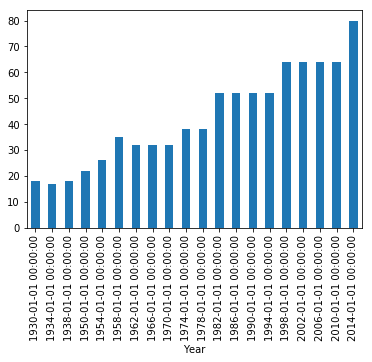

In [56]:

import numpy as np
##  
world_cup_matches_number_of_attendents = world_cup_matches.groupby(['Datetime']).agg({'Attendance':np.sum})
##
print(world_cup_matches_number_of_attendents.columns)


##number of matches played throughout the years

world_cup_matches_year = world_cup_matches.groupby(['Year']).size().reset_index()

world_cup_matches_year['n'] = world_cup_matches_year[0]

#world_cup_matches_year.drop([0])

del world_cup_matches_year[0]




#print(world_cup_matches_year.Year)


world_cup_matches_year['Year'] = world_cup_matches_year.Year.astype(int)

world_cup_matches_year.Year = pd.to_datetime(world_cup_matches_year.Year, format='%Y')

world_cup_matches_year.plot(kind='bar',x='Year',y='n')
plt.legend().remove()
plt.show()


#world_cup_matches_year['Year'] = pd.to_numeric(world_cup_matches_year['Year'], errors='coerce')
#world_cup_matches_year['Year'] = pd.to_datetime(world_cup_matches_year['Year'], format='%Y')

##

#world_cup_matches_year.head()



## Number of Cups by each Country

In [57]:
#world_cups.head()
#print(world_cups)

mask = world_cups.Winner == 'Germany FR'
column_name = 'Winner'
world_cups.loc[mask, column_name] = 'Germany'
#print(world_cups)
df = world_cups.groupby('Winner').agg({'Winner': 'count'}).sort_values(by='Winner')
df['countries'] = df.index
df.columns = ['number_of_cups','countries']
df.reset_index(drop = True, inplace = True)

df['lat'] = [-0.116667,2,-4,-64,-56,9,12,-52]
df['lon'] = [51.5,47,40,-34,-33,51,43,-10]
df['number_of_cups']= 10000*(np.exp(df['number_of_cups'].astype('float')))




#print(df)

m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(df)):
   folium.Circle(
      location=[df.iloc[i]['lon'], df.iloc[i]['lat']],
      popup=df.iloc[i]['countries'],
      radius=df.iloc[i]['number_of_cups'],
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m




## Number of Total Goals Scored per match over the Years

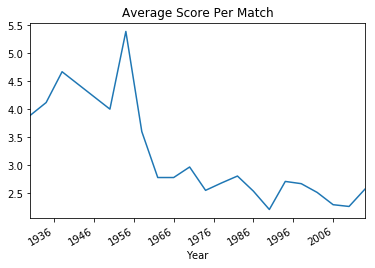

In [58]:
world_cup_matches['total_goals'] = world_cup_matches['Home Team Goals']+world_cup_matches['Away Team Goals']
number_of_goals_per_year = world_cup_matches.groupby(['Year']).agg({'total_goals':np.sum}).reset_index()
number_of_goals_per_year.Year = number_of_goals_per_year.Year.astype(int)
number_of_goals_per_year.Year = pd.to_datetime(number_of_goals_per_year.Year, format='%Y')

average_goals_scored_per_match = pd.merge(number_of_goals_per_year, world_cup_matches_year, on =['Year'])
average_goals_scored_per_match['average_score_per_match'] = average_goals_scored_per_match['total_goals']/average_goals_scored_per_match['n']
average_goals_scored_per_match.plot(kind='line',x='Year',y='average_score_per_match',title='Average Score Per Match')
plt.legend().remove()

plt.show()


* The average goals scored per match has been decreasing as time goes by.

## Attendence by Year

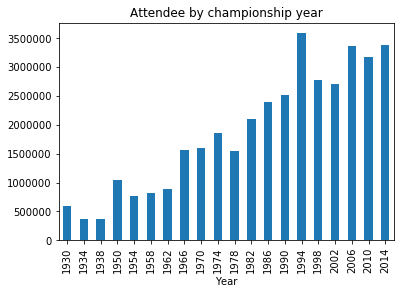

In [59]:
world_cups['Attendance']= world_cups['Attendance'].str.replace('.', '')
world_cups['Attendance']=world_cups['Attendance'].astype(int)
world_cups.plot(x='Year',y='Attendance',kind='bar',title='Attendee by championship year')
plt.legend().remove()

plt.show()



## Average Number of Attendees Per Match over the Years

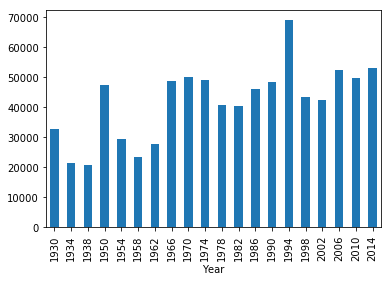

In [60]:
matches_played = world_cups[['Year','MatchesPlayed','Attendance']].drop_duplicates()
matches_played['Average'] = matches_played['Attendance']/matches_played['MatchesPlayed']
matches_played['Average']= np.round(matches_played['Average'])
matches_played.plot(x='Year',y='Average',kind='bar')
plt.legend().remove()
plt.show()

## Which country has hosted the most number of world cups?

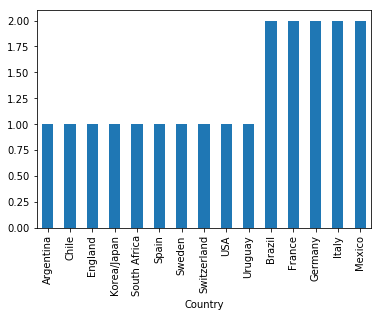

In [61]:
country=world_cups.groupby('Country').size().reset_index()
country.columns= ['Country','n']
country.sort_values(by='n').plot(kind='bar',x='Country',y='n')
plt.legend().remove()

plt.show()

## Total Number of Matches Played Per Championship

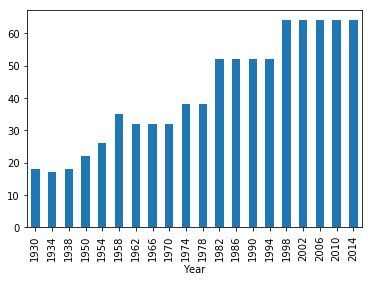

In [62]:

matches_played = world_cup_matches[['Year','MatchID']].dropna()
matches_played['Year']=matches_played['Year'].astype(int)
matches_played = matches_played.drop_duplicates().groupby('Year').size().reset_index()
matches_played.plot(kind='bar',x='Year')
plt.legend().remove()

plt.show()

## Total Number of Countries Per Championship

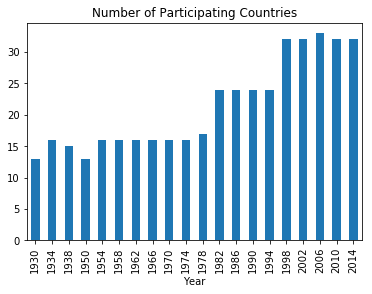

In [63]:
matches = world_cup_matches[['Year','Home Team Name','Away Team Name','MatchID']]
matches = pd.melt(matches, id_vars=['Year','MatchID'], value_vars=['Home Team Name', 'Away Team Name'])
#print(matches)
matches= matches.dropna()
matches["Year"] = matches['Year'].astype(int)
matches = matches.drop(['variable','MatchID'],axis=1).drop_duplicates()
matches.groupby(['Year']).size().reset_index().plot(kind='bar',x='Year',title='Number of Participating Countries')
plt.legend().remove()
plt.show()


## How does the distribution of goal differences over the championships change?

In [64]:
world_cup_matches['diff'] = world_cup_matches['Home Team Goals']- world_cup_matches['Away Team Goals']
world_cup_matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'total_goals', 'diff'],
      dtype='object')

In [65]:
world_cup_matches_goal_diff = world_cup_matches[['MatchID','Year','diff']]
world_cup_matches_goal_diff= world_cup_matches_goal_diff.dropna().drop_duplicates()
world_cup_matches_goal_diff= world_cup_matches_goal_diff.drop('MatchID',axis=1)

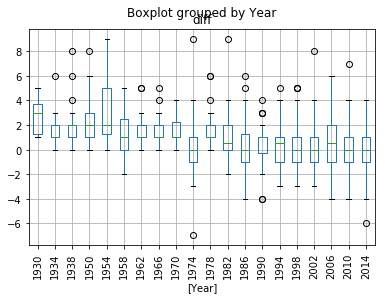

In [66]:
#world_cup_matches_diff= world_cup_matches_diff.dropna()
world_cup_matches_goal_diff['Year'] = world_cup_matches_goal_diff['Year'].astype(int)
world_cup_matches_goal_diff.boxplot(by='Year')
plt.xticks(rotation=90)
plt.show()

In [67]:
world_cup_matches_diff.Year.describe()

count     836.000000
mean     1984.535885
std        22.299860
min      1930.000000
25%      1970.000000
50%      1990.000000
75%      2002.000000
max      2014.000000
Name: Year, dtype: float64